# 💰💰 Sales Trends Analysis

## 🎯 Objectives

This notebook explores sales and revenue trends in the e-commerce dataset. The main goals are to:

- Analyze revenue and order trends over time (monthly, quarterly)
- Identify seasonal peaks
- Track performance across regions
- Track performance by product and customer demographics

## 📦 Data Source

The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [22]:
# Check for nulls
# df.isna().sum()

In [3]:
df_copy = df.copy()

## Analysis

In this section, the impact of different features of the data on sales and revenue would be considered. Revenue trends, order trends and shipment trends by product and region would also be reviewed. Different factors that may affect revenue and delivery would be tackled.

### Overview of Sales Trends

In [4]:
# Reset Order Date field to Datetime
df_copy["Order Date"] = pd.to_datetime(df["Order Date"])
df_copy["Order Date"].head()

0   2023-04-09
1   2023-08-28
2   2023-01-18
3   2023-01-11
4   2023-10-23
Name: Order Date, dtype: datetime64[ns]

In [5]:
# Extract Sales Trends Data
sales_trends = df_copy.set_index("Order Date")["Total Price Calc"].rename("Sales Trends").sort_index()
sales_trends.head()

Order Date
2023-01-01     500.0
2023-01-02    1200.0
2023-01-03     800.0
2023-01-03     600.0
2023-01-03      30.0
Name: Sales Trends, dtype: float64

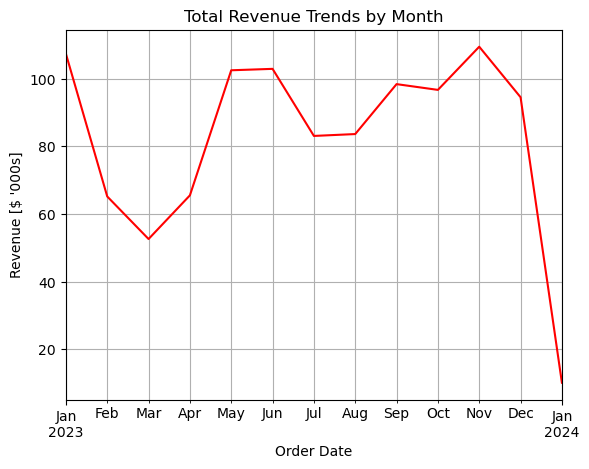

In [12]:
# Plot Total Revenue by Month 
(sales_trends.resample("1ME").sum() / 1e3).plot(kind='line', color="red")
plt.grid(which="both")
plt.ylabel("Revenue [$ '000s]")
plt.title("Total Revenue Trends by Month")
plt.show();

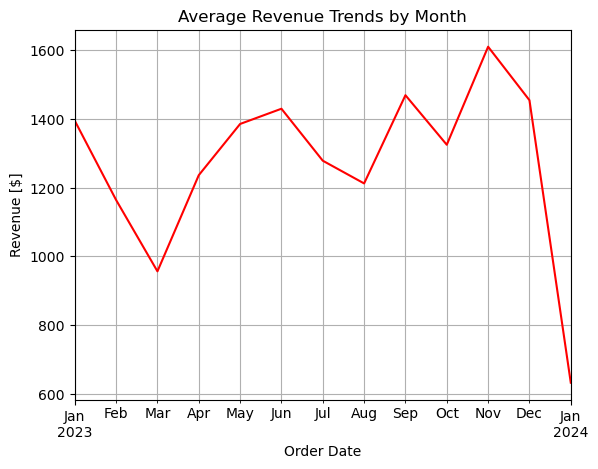

In [ ]:
# Plot Average Revenue by Month 
(sales_trends.resample("1ME").mean()).plot(kind='line', color="red")
plt.grid(which="both")
plt.ylabel("Revenue [$]")
plt.title("Average Revenue Trends by Month")
plt.show();

The trends for both the average and total revenues per month reflect very similar patterns: `Decreases from Jan to March`, then `increase until June`, `decreases until August` and fluctuating monthly afterwards until it reaches an `all time high in November`.

Now, let's plot quarterly revenues to better understand the data.

##### Quarterly Revenue trends

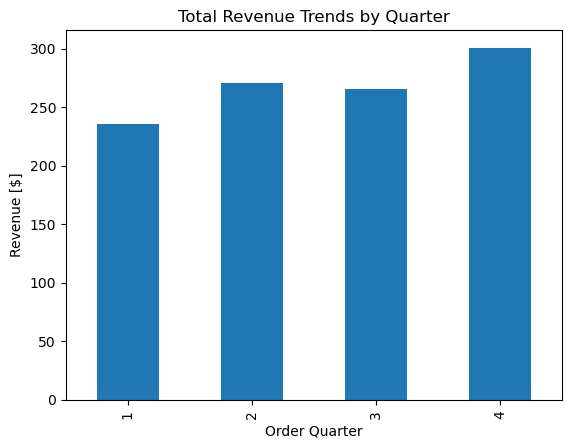

In [ ]:
# Plot Total Revenue by Quarter
((df_copy.groupby(by="Order Quarter")["Total Price Calc"].sum() / 1e3)
    .plot(kind="bar")
)
plt.ylabel("Revenue [$ '000s]")
plt.title("Total Revenue Trends by Quarter")
plt.show();

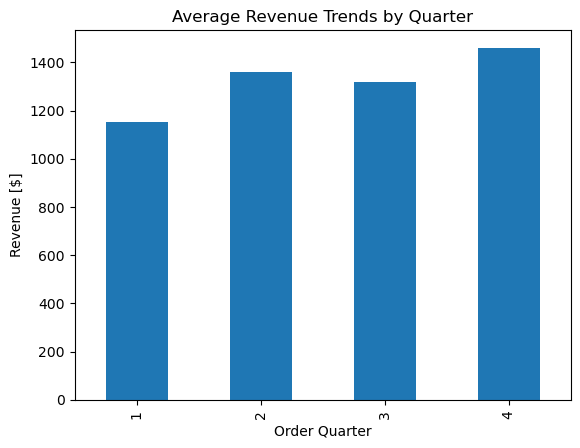

In [35]:
# Plot Average Revenue by Quarter
(df_copy.groupby(by="Order Quarter")["Total Price Calc"].mean()
    .plot(kind="bar")
)
plt.ylabel("Revenue [$]")
plt.title("Average Revenue Trends by Quarter")
plt.show();

Both the total and average revenue quarterly plots reveal the same pattern for revenue over the period. Revenue is lowest in Q1, then increaes in Q2, then decreases in Q3 and peaks at Q4. This shows that the `most profitable periods` of the year `are Q2 and Q4` (particularly in November where revenue peaks).

#### Order Trends

Although the most profitable quarters have been identified to be Q2 and Q4 and most profitable month as November, we proceed to analyze order trends, to allow us further perspective on the findings.

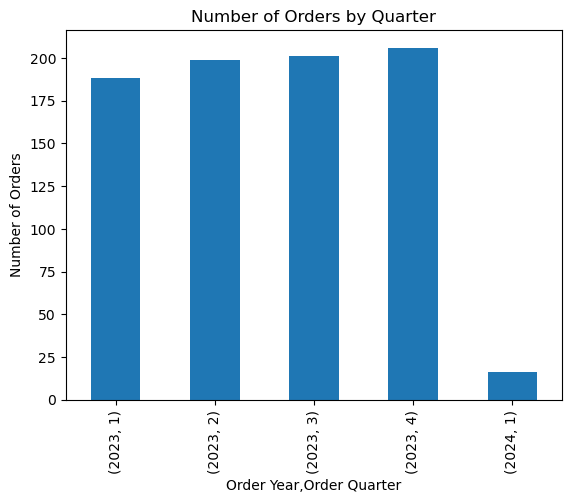

In [48]:
# Plot number of orders per quarter
df_copy.groupby(["Order Year","Order Quarter"]).size().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Quarter")
plt.show();

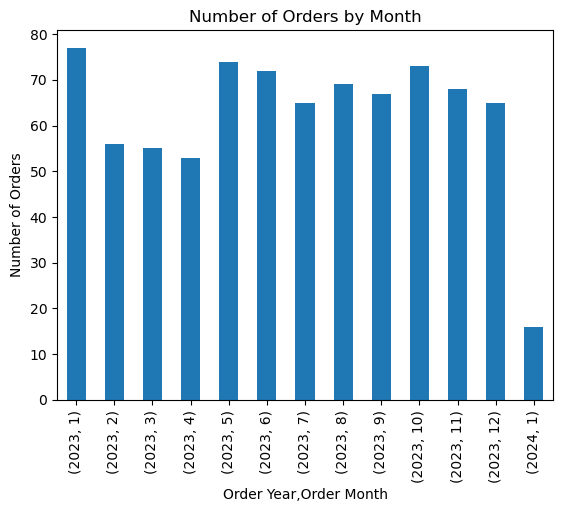

In [50]:
# Plot number of orders per month
df_copy.groupby(by=["Order Year", "Order Month"]).size().plot(kind="bar")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Month")
plt.show();

Number of orders increases consistently every quarter, whilst the monthly trends show major fluctuations. Per month, both Q1 and Q3 show decreasing number of orders from the first month to the third, and this is very pronounced in the first quarter. Interestingly, `November` which records the highest revenue does not have the highest number of orders. This may indicate that products sold in this month may have higher price since a smaller number of orders was needed to reach the peak revenue.

Specific months in different quarters would be explored to reveal further insights.

- Analyze revenue and order trends over time (monthly, quarterly)
- Identify seasonal peaks
- Track performance across regions
- Track performance by product and customer demographics

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.